In [1]:
#multiple linear regression
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import matplotlib as mpl  
from sklearn.datasets import load_boston  
from sklearn import linear_model 

In [2]:
boston = load_boston()  
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)  
dataset['target'] = boston.target 

In [3]:
observations = len(dataset)  
variables = dataset.columns[:-1]  
X = dataset.ix[:,:-1]  
y = dataset['target'].values

C:\Users\User 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
import statsmodels.api as sm  
import statsmodels.formula.api as smf

In [5]:
Xc = sm.add_constant(X)  
linear_regression = sm.OLS(y,Xc)  
fitted_model = linear_regression.fit()

In [6]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 06 Sep 2018   Prob (F-statistic):          6.95e-135
Time:                        09:17:14   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
#To determine the manner and number of predictors affecting each other, the right tool is a correlation matrix
X = dataset.ix[:,:-1] 
correlation_matrix = X.corr() 
print (correlation_matrix)

C:\Users\User 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 

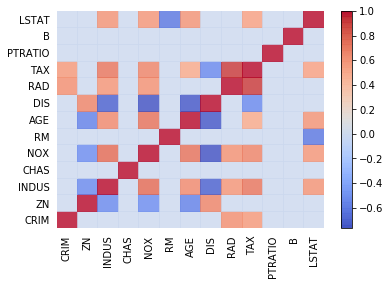

In [8]:
def visualize_correlation_matrix(data, hurdle = 0.0):    
    R = np.corrcoef(data, rowvar=0)    
    R[np.where(np.abs(R)<hurdle)] = 0.0    
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)    
    heatmap.axes.set_frame_on(False)    
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)    
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(variables, minor=False)    
    plt.xticks(rotation=90)    
    heatmap.axes.set_yticklabels(variables, minor=False)    
    plt.tick_params(axis='both', which='both', bottom='off', top='off', left = 'off', right = 'off')    
    plt.colorbar()    
    plt.show()
visualize_correlation_matrix(X, hurdle=0.5)

In [11]:
#After extracting the eigenvalues, we print them in descending order and look for any element whose value is near to zero or small compared to the others.
# Small values represent a high but not critical source of multicollinearity. 
corr = np.corrcoef(X, rowvar=0)  
eigenvalues, eigenvectors = np.linalg.eig(corr)

In [12]:
print (eigenvalues) 

[ 6.12265476  1.43206335  1.24116299  0.85779892  0.83456618  0.65965056
  0.53901749  0.39654415  0.06351553  0.27743495  0.16916744  0.18616388
  0.22025981]


In [13]:
 print (eigenvectors[:,8]) 

[-0.04552843  0.08089873  0.25126664 -0.03590431 -0.04389033 -0.04580522
  0.03870705  0.01828389  0.63337285 -0.72024335 -0.02350903  0.00485021
 -0.02477196]


In [14]:
print (variables[2], variables[8], variables[9])

INDUS RAD TAX


In [ ]:
# remove elements causing multicollinearity